In [10]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import os
import matplotlib.pyplot as plt

In [11]:
#Load the respective data
header_names = ['ID','label','statement','subject','speaker','job title','state','party','hist_barely','hist_false','hist_half_true','hist_mostly_true','hist_pants_on_fire','location']
df_train=pd.read_csv('train.tsv',sep='\t',names=header_names)
df_val=pd.read_csv('valid.tsv',sep='\t', names=header_names)
df_test=pd.read_csv('test.tsv',sep='\t', names = header_names)

In [12]:
# Check true data
df_train.head()

,ID,label,statement,subject,speaker,job title,state,party,hist_barely,hist_false,hist_half_true,hist_mostly_true,hist_pants_on_fire,location
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [13]:
class_names = df_val['label'].unique()
class_names = np.array(['pants-fire', 'false','barely-true', 'half-true','mostly-true', 'true'],dtype=object)
class_names

array(['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true',
       'true'], dtype=object)

In [14]:
x_train = df_train['statement'].values
x_val = df_val['statement'].values
x_test = df_test['statement'].values

x_train

array(['Says the Annies List political group supports third-trimester abortions on demand.',
       'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
       'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
       ...,
       'Says an alternative to Social Security that operates in Galveston County, Texas, has meant that participants will retire with a whole lot more money than under Social Security.',
       'On lifting the U.S. Cuban embargo and allowing travel to Cuba.',
       "The Department of Veterans Affairs has a manual out there telling our veterans stuff like, 'Are you really of value to your community?' You know, encouraging them to commit suicide."],
      dtype=object)

In [15]:
y_train = df_train.label
y_val = df_val.label
y_test = df_test.label

In [16]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_val=tfidf_vectorizer.transform(x_val)

tfidf_train.shape

(10240, 11915)

In [18]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(tfidf_train, y_train)

y_pred_val = clf.predict(tfidf_val)
score=accuracy_score(y_val,y_pred_val)

score=accuracy_score(y_val,y_pred_val)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 25.39%


In [22]:
clf = svm.NuSVC(decision_function_shape='ovr')
clf.fit(tfidf_train, y_train)

y_pred_val = clf.predict(tfidf_val)
score=accuracy_score(y_val,y_pred_val)

score=accuracy_score(y_val,y_pred_val)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 24.14%


In [24]:
clf = svm.LinearSVC()
clf.fit(tfidf_train, y_train)

y_pred_val = clf.predict(tfidf_val)
score=accuracy_score(y_val,y_pred_val)

score=accuracy_score(y_val,y_pred_val)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 22.82%


Confusion matrix, without normalization
[[  3  48  15  31  10   9]
 [  0 117  24  70  36  16]
 [  0  74  24  84  41  14]
 [  0  74  14  85  58  17]
 [  0  60  14  82  70  25]
 [  0  43   3  47  49  27]]
Normalized confusion matrix
[[0.02586207 0.4137931  0.12931034 0.26724138 0.0862069  0.07758621]
 [0.         0.44486692 0.09125475 0.2661597  0.13688213 0.0608365 ]
 [0.         0.31223629 0.10126582 0.35443038 0.17299578 0.05907173]
 [0.         0.2983871  0.05645161 0.34274194 0.23387097 0.06854839]
 [0.         0.23904382 0.05577689 0.32669323 0.27888446 0.09960159]
 [0.         0.25443787 0.01775148 0.27810651 0.28994083 0.15976331]]


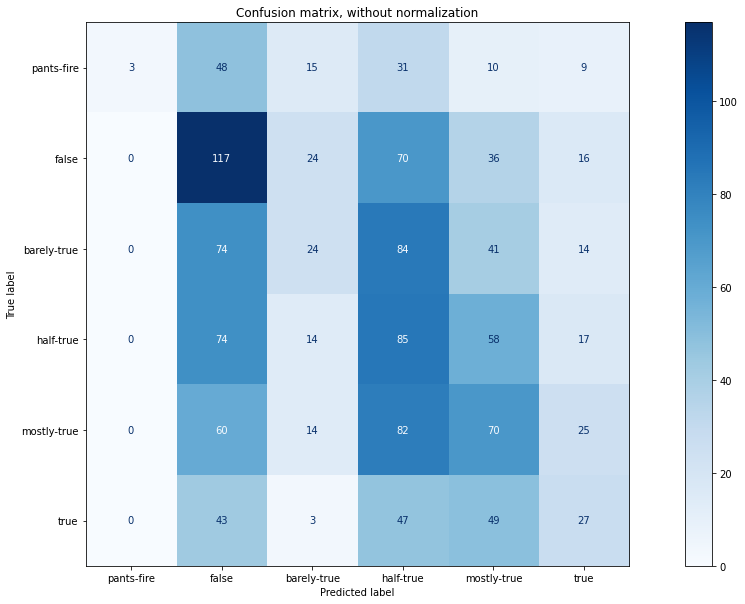

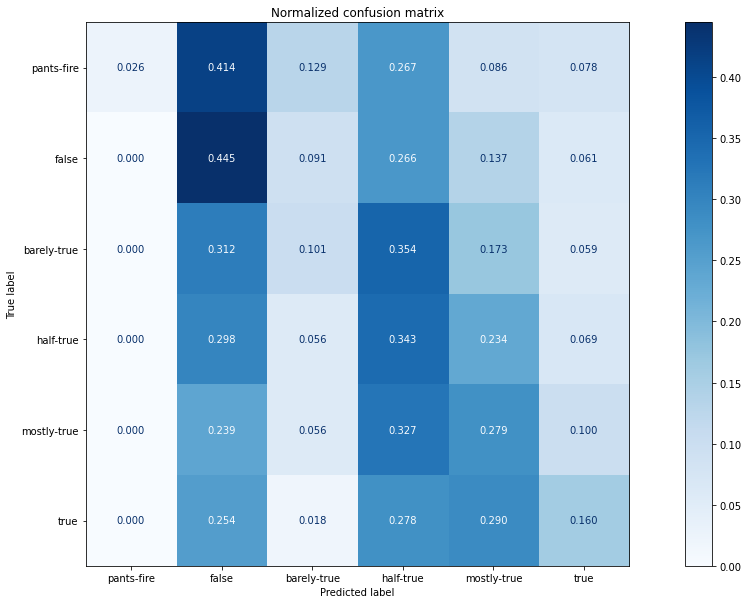

In [20]:
# Plot confusion matrix
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(clf, tfidf_val, y_val,
                                 labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels([''] + class_names)
    disp.ax_.set_yticklabels([''] + class_names)

    print(title)
    print(disp.confusion_matrix)

plt.show()